In [6]:
import sklearn
with open('Infinite_Jest_-_David_Foster_just_text.txt', 'r') as file_in:
    infinite_jest = file_in.read()
import re

In [7]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
stop_words = list(ENGLISH_STOP_WORDS)

In [8]:
#split book into paragraphs
infinite_list= infinite_jest.split('\n\n')
infinite_list

['',
 '',
 'Contents',
 'COPYRIGHT PAGE',
 'FOREWORD',
 'YEAR OF GLAD',
 'YEAR OF THE DEPEND ADULT UNDERGARMENT',
 '1 APRIL — YEAR OF THE TUCKS MEDICATED PAD',
 '9 MAY — YEAR OF THE DEPEND ADULT UNDERGARMENT',
 'YEAR OF THE DEPEND ADULT UNDERGARMENT',
 'YEAR OF THE DEPEND ADULT UNDERGARMENT',
 'YEAR OF THE DEPEND ADULT UNDERGARMENT',
 'AS OF YEAR OF THE DEPEND ADULT UNDERGARMENT',
 'YEAR OF THE DEPEND ADULT UNDERGARMENT',
 '30 APRIL — YEAR OF THE DEPEND ADULT UNDERGARMENT',
 '3 NOVEMBER Y.D.A.U.',
 'WINTER B.S. 1960 — TUCSON AZ',
 'LATE OCTOBER YEAR OF THE DEPEND ADULT UNDERGARMENT',
 '7 NOVEMBER YEAR OF THE DEPEND ADULT UNDERGARMENT',
 '6 NOVEMBER YEAR OF THE DEPEND ADULT UNDERGARMENT',
 '7 NOVEMBER — YEAR OF THE DEPEND ADULT UNDERGARMENT',
 '8 NOVEMBER YEAR OF THE DEPEND ADULT UNDERGARMENT INTERDEPENDENCE DAY GAUDEAMUS IGITUR',
 '8 NOVEMBER YEAR OF THE DEPEND ADULT UNDERGARMENT GAUDEAMUS IGITUR',
 'YEAR OF THE DEPEND ADULT UNDERGARMENT',
 'PRE-DAWN, 1 MAY Y.D.A.U. OUTCROPPING NORTHWE

In [9]:
#narrow graphs to those containing quotes
graph_list = []
for paragraph in infinite_list:
    if re.search(r"(\‘.*\’ .* says)" , paragraph):
        graph_list.append(paragraph)
print(graph_list)


['‘— belief that you could well make, even as a freshman, a real contribution to this University’s varsity tennis program. We are pleased,’ he either says or reads, removing a page, ‘that a competition of some major sort here has brought you down and given us the chance to sit down and chat together about your application and potential recruitment and matriculation and scholarship.’', '‘I’ve been asked to add that Hal here is seeded third, Boys’ 18-and-Under Singles, in the prestigious WhataBurger Southwest Junior Invitational out at the Randolph Tennis Center —’ says what I infer is Athletic Affairs, his cocked head showing a freckled scalp.', '‘This kind of… how shall I put it… incongruity,’ Admissions says, his expression frank and concerned, ‘I’ve got to tell you sends up a red flag of potential concern during the admissions process.’', '‘I’m not sure Hal’s sure just what’s being implied here,’ my uncle says. The Dean at center is fingering his lapels as he interprets distasteful c

In [14]:
#compile list of just quotes
quotes = []
for paragraph in graph_list:
    quotes+=re.findall(r"(\‘.*\’ .* says)", paragraph)
print(quotes)

['‘— belief that you could well make, even as a freshman, a real contribution to this University’s varsity tennis program. We are pleased,’ he either says', '‘I’ve been asked to add that Hal here is seeded third, Boys’ 18-and-Under Singles, in the prestigious WhataBurger Southwest Junior Invitational out at the Randolph Tennis Center —’ says', '‘This kind of… how shall I put it… incongruity,’ Admissions says', '‘I’m not sure Hal’s sure just what’s being implied here,’ my uncle says', '‘Dean Sawyer means the court, of course, Chuck,’ Athletic Affairs says', '‘Assuming these board scores are accurate reflectors of true capacity in this case,’ Academic Affairs says', '‘— would be able to see a distinct flavor of minor-sport prejudice about this whole thing,’ C.T. says', '‘I think it’s time to let the actual applicant himself speak out on his own behalf,’ Academic Affairs says', '‘Coach White could accompany Mr. Tavis and his associate out to reception,’ the yellow Dean says', '‘— led to b

In [100]:
#create dictionary, add characters
infinite_dict={}
for quote in quotes:
    words = quote.split()
    dex = words.index('says') 
    char = words[dex - 1]
    if char[0].isupper(): 
        if char not in infinite_dict.keys():
            infinite_dict[char] = quote
        else: 
            infinite_dict[char] += quote
print(infinite_dict)

{'Arslanian': '‘Very much bitching also in the lavatories,’ Arslanian says‘I think alienation,’ Arslanian says‘Purchase a clue Kent Blott!’ Arslanian says‘He is tired,’ Arslanian says', 'Francis': '‘Still sucking air I see,’ Ferocious Francis says‘Figured God needed a little help the other night did you?’ Francis says‘Oxycodone-nalaxone compound, 358 with a short half-life but only a C-III grading of abuse.’ There’s no way the guy could be like intentionally making his voice this wheedly-sounding; it’s got to be Gately’s own Disease. The Spider. Gately envisions his brain struggling in a silk cocoon. He keeps summoning to mind the little detox-story Ferocious Francis tells from the Commitment podium, how they gave him Librium 359 to help with the discomfort of Withdrawal, and how Francis says', 'Axford': '‘That we could get bids from, you’re saying,’ Axford says‘But that was from a massive early dose,’ Axford says', 'Pemulis': '‘The Diz’ll say use your own judgment,’ Pemulis says‘Leave

In [101]:
#process text to form narrator entry
narrator_text = []
for paragraph in infinite_list:
    if not re.search(r"(\‘.*\’)" , paragraph):
        narrator_text.append(paragraph)
print(narrator_text)


['', '', 'Contents', 'COPYRIGHT PAGE', 'FOREWORD', 'YEAR OF GLAD', 'YEAR OF THE DEPEND ADULT UNDERGARMENT', '1 APRIL — YEAR OF THE TUCKS MEDICATED PAD', '9 MAY — YEAR OF THE DEPEND ADULT UNDERGARMENT', 'YEAR OF THE DEPEND ADULT UNDERGARMENT', 'YEAR OF THE DEPEND ADULT UNDERGARMENT', 'YEAR OF THE DEPEND ADULT UNDERGARMENT', 'AS OF YEAR OF THE DEPEND ADULT UNDERGARMENT', 'YEAR OF THE DEPEND ADULT UNDERGARMENT', '30 APRIL — YEAR OF THE DEPEND ADULT UNDERGARMENT', '3 NOVEMBER Y.D.A.U.', 'WINTER B.S. 1960 — TUCSON AZ', 'LATE OCTOBER YEAR OF THE DEPEND ADULT UNDERGARMENT', '7 NOVEMBER YEAR OF THE DEPEND ADULT UNDERGARMENT', '6 NOVEMBER YEAR OF THE DEPEND ADULT UNDERGARMENT', '7 NOVEMBER — YEAR OF THE DEPEND ADULT UNDERGARMENT', '8 NOVEMBER YEAR OF THE DEPEND ADULT UNDERGARMENT INTERDEPENDENCE DAY GAUDEAMUS IGITUR', '8 NOVEMBER YEAR OF THE DEPEND ADULT UNDERGARMENT GAUDEAMUS IGITUR', 'YEAR OF THE DEPEND ADULT UNDERGARMENT', 'PRE-DAWN, 1 MAY Y.D.A.U. OUTCROPPING NORTHWEST OF TUCSON AZ U.S.A., 

In [102]:
#create narrator character and add to dtm
char = 'Narrator'
infinite_dict[char] = ''
for paragraph in narrator_text:
    infinite_dict[char] += paragraph   

In [103]:
#Create document term matrix of all words used
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
cv = CountVectorizer()
dtm = cv.fit_transform(infinite_dict.values())
term_list = cv.get_feature_names()
dtm_df = pd.DataFrame(dtm.toarray(), index = infinite_dict.keys(), columns = term_list)

In [104]:
dtm_df

,00,000,0000,0000h,0001h,0004h,0005,0005h,0015h,0020h,...,zuckungzuckungzuckung,zweig,zygomatics,ça,éclat,étagère,était,étoiles,être,überad
Arslanian,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Francis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Axford,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pemulis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Crocodile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Traub,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blott,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lenz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Boone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Schacht,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
#normalize word frequency so words can be compared
import numpy as np
row_sums = np.sum(dtm.toarray(), axis=1)
normed = dtm.toarray()/row_sums[:,None]
#normed
dtm_tb = pd.DataFrame(normed, index = infinite_dict.keys(), columns = term_list)

dtm_tb

,00,000,0000,0000h,0001h,0004h,0005,0005h,0015h,0020h,...,zuckungzuckungzuckung,zweig,zygomatics,ça,éclat,étagère,était,étoiles,être,überad
Arslanian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Francis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Axford,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Pemulis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Crocodile,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Traub,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Blott,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lenz,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Boone,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Schacht,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [106]:
#Calculate distances in vector space

from scipy.spatial import distance
from sklearn.metrics import pairwise

dist_matrix = pairwise.pairwise_distances(dtm_tb, metric='euclidean')
dist_matrix


array([[  5.26835606e-09,   2.89874953e-01,   3.46410162e-01, ...,
          2.84937771e-01,   2.87205005e-01,   4.08248290e-01],
       [  2.89874953e-01,   0.00000000e+00,   2.76543791e-01, ...,
          1.14425752e-01,   1.15537511e-01,   3.85870825e-01],
       [  3.46410162e-01,   2.76543791e-01,   0.00000000e+00, ...,
          2.73619044e-01,   2.75787918e-01,   4.29285120e-01],
       ..., 
       [  2.84937771e-01,   1.14425752e-01,   2.73619044e-01, ...,
          0.00000000e+00,   6.18460717e-02,   3.77841272e-01],
       [  2.87205005e-01,   1.15537511e-01,   2.75787918e-01, ...,
          6.18460717e-02,   1.86264515e-09,   3.79237674e-01],
       [  4.08248290e-01,   3.85870825e-01,   4.29285120e-01, ...,
          3.77841272e-01,   3.79237674e-01,   0.00000000e+00]])

In [107]:
#display graphically
dtm_df = pd.DataFrame(dist_matrix, index = infinite_dict.keys(), columns = infinite_dict.keys())
dtm_df

,Arslanian,Francis,Axford,Pemulis,Crocodile,Traub,Blott,Lenz,Boone,Schacht,...,Narrator,Mario,Harv,Rader,C.T.,K.,Coyle,He,"Disease,",Unwin
Arslanian,5.268356e-09,0.289875,0.346410,0.265607,0.322482,0.500000,0.359011,0.362688,0.383007,0.338502,...,2.888857e-01,0.363624,0.355903,0.552771,0.353553,0.348807,0.337886,0.284938,2.872050e-01,0.408248
Francis,2.898750e-01,0.000000,0.276544,0.157904,0.188624,0.502389,0.364670,0.345549,0.350878,0.276936,...,1.112756e-01,0.303293,0.314308,0.575001,0.254745,0.261953,0.241481,0.114426,1.155375e-01,0.385871
Axford,3.464102e-01,0.276544,0.000000,0.270328,0.290862,0.519615,0.398609,0.396993,0.396993,0.350892,...,2.708141e-01,0.369685,0.369685,0.580230,0.346410,0.339116,0.331662,0.273619,2.757879e-01,0.429285
Pemulis,2.656073e-01,0.157904,0.270328,0.000000,0.202503,0.479777,0.339262,0.330275,0.338464,0.260960,...,1.434410e-01,0.301311,0.301311,0.547232,0.261320,0.261378,0.253539,0.147043,1.471037e-01,0.364018
Crocodile,3.224818e-01,0.188624,0.290862,0.202503,0.000000,0.520251,0.385409,0.378485,0.378485,0.314303,...,1.647406e-01,0.336132,0.342089,0.590715,0.281733,0.285870,0.273131,0.170410,1.698835e-01,0.401689
Traub,5.000000e-01,0.502389,0.519615,0.479777,0.520251,0.000000,0.528099,0.532032,0.532032,0.515388,...,5.081092e-01,0.525991,0.525991,0.645497,0.530330,0.529150,0.533854,0.507173,5.082634e-01,0.566947
Blott,3.590110e-01,0.364670,0.398609,0.339262,0.385409,0.528099,0.000000,0.424416,0.424416,0.396250,...,3.663200e-01,0.410961,0.410961,0.573488,0.407908,0.404832,0.410961,0.365272,3.667174e-01,0.420128
Lenz,3.626882e-01,0.345549,0.396993,0.330275,0.378485,0.532032,0.424416,0.000000,0.406558,0.395774,...,3.498106e-01,0.380228,0.410872,0.579731,0.390354,0.400980,0.395846,0.340566,3.450041e-01,0.463547
Boone,3.830068e-01,0.350878,0.396993,0.338464,0.378485,0.532032,0.424416,0.406558,0.000000,0.395774,...,3.567871e-01,0.380228,0.395846,0.579731,0.390354,0.400980,0.395846,0.357336,3.545461e-01,0.463547
Schacht,3.385016e-01,0.276936,0.350892,0.260960,0.314303,0.515388,0.396250,0.395774,0.395774,0.000000,...,2.787761e-01,0.371652,0.371652,0.572822,0.342327,0.347311,0.336341,0.279458,2.799483e-01,0.430428


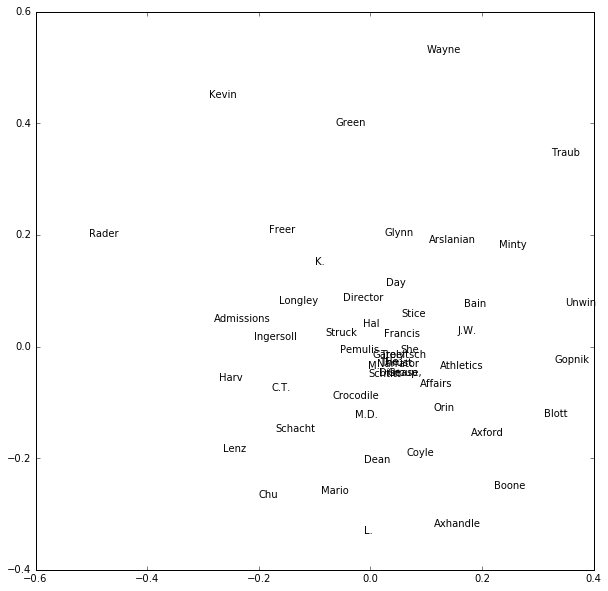

In [108]:
#visualize in plot
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
%matplotlib inline

mds = MDS(n_components = 2, dissimilarity="precomputed")
embeddings = mds.fit_transform(dist_matrix)

_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(infinite_dict.keys())):
    ax.annotate(list(infinite_dict.keys())[i], ((embeddings[i,0], embeddings[i,1])))
    

In [109]:
#Which character is 'closest' to narrator?
l = list(infinite_dict.keys())
for i in range(len(l)):
    if l[i] == "Narrator":
        print(i)
min_dist = float("inf")
best_char = None
for i in range(dist_matrix.shape[1]):
    if i != 42:
        if dist_matrix[42][i] < min_dist:
            min_dist = dist_matrix[42][i]
            best_char = l[i]
print(best_char)


42
Thrust


In [110]:
#Display closest characters to narrator
sorting = []
for i, elem in enumerate(l):
    sorting.append((elem, dist_matrix[42][i]))
sorted(sorting, key = lambda x: x[1])       

[('Narrator', 2.8370965666561979e-08),
 ('Thrust', 0.030759831973259006),
 ('He', 0.042742365558878982),
 ('Troeltsch', 0.048236637184820935),
 ('Gately', 0.048491809479655854),
 ('Disease,', 0.049748386672040137),
 ('M.', 0.053369546261998503),
 ('Group', 0.057297534110578391),
 ('Schtitt', 0.069565751005669738),
 ('She', 0.091436661305452333),
 ('Francis', 0.11127560586929472),
 ('Hal', 0.13357342148731471),
 ('Pemulis', 0.14344103944854067),
 ('Stice', 0.1592888769736186),
 ('Athletics', 0.16189534531288205),
 ('Crocodile', 0.16474058369214425),
 ('Affairs', 0.16659266829341546),
 ('M.D.', 0.16924454785863857),
 ('Struck', 0.17693105839892692),
 ('Director', 0.1855434803205723),
 ('Day', 0.20084830767148149),
 ('Orin', 0.20594925777595777),
 ('J.W.', 0.22414235223810441),
 ('Coyle', 0.22666033443020231),
 ('Dean', 0.22944683058390961),
 ('Bain', 0.23179913783276701),
 ('K.', 0.24256861664302512),
 ('Longley', 0.24610682274992843),
 ('C.T.', 0.25017283934728174),
 ('Glynn', 0.2621683